In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [103]:
df=pd.read_csv('Hitters.csv')
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [104]:
## Categorical Variables

print('Types of Leagues are' , df.League.unique())
print('Types of Divisions are ' , df.Division.unique())
print('Types of NewLeague are',df.NewLeague.unique())

Types of Leagues are ['A' 'N']
Types of Divisions are  ['E' 'W']
Types of NewLeague are ['A' 'N']


In [105]:
hits_num=pd.get_dummies(df,columns=['League','Division','NewLeague'],drop_first=True)

In [106]:
hits_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [107]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [108]:
hits_nums_cleaned=hits_num.dropna()
hits_nums_cleaned.isna().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

### Visualizing Data

<Figure size 720x360 with 0 Axes>

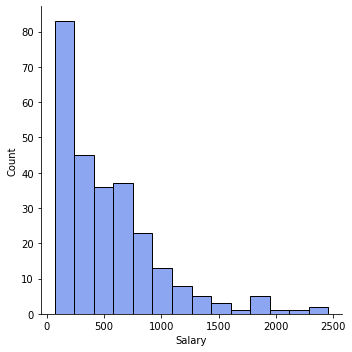

In [109]:
sns.set_palette('coolwarm')
plt.figure(figsize=(10,5))
sns.displot(hits_nums_cleaned['Salary'])

In [110]:
corr=hits_nums_cleaned.corr()
corr['Salary'].sort_values(ascending=False).to_frame()

,Salary
Salary,1.000000
CRBI,0.566966
CRuns,0.562678
CHits,0.548910
CAtBat,0.526135
CHmRun,0.524931
CWalks,0.489822
RBI,0.449457
Walks,0.443867
Hits,0.438675


<AxesSubplot:>

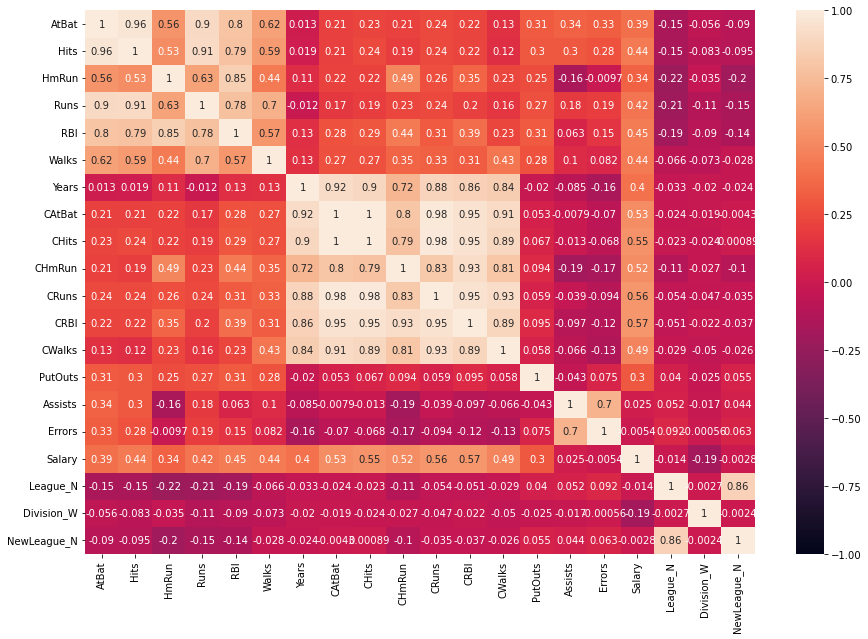

In [111]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1)

In [112]:
# Declare Dependant and Independatnt variables

x=hits_nums_cleaned.drop(columns=['Salary'])
y=hits_nums_cleaned['Salary']

In [113]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


In [114]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [115]:
# Split Data into Train , Test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.35)

In [116]:
# Scaling our Data
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [117]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [118]:
print('Linear Regression Coeff' , lin_reg.coef_)
print('Linear Regression interception' , lin_reg.intercept_)

Linear Regression Coeff [-186.42862719  367.44619958  115.65964334  -94.13165836 -123.92050226
   91.23056643  104.10665696 -790.43623478  236.13790729   23.99874624
  654.32161638  200.07678162 -208.45615      81.95535442   43.22930852
   -2.4606235    47.62944137  -46.98418609   -2.78980798]
Linear Regression interception 525.7229705882351


In [119]:
lin_reg_y=lin_reg.predict(x_test_scaled)
lin_reg_y

array([6.42809231e+02, 7.53837716e+02, 8.40670971e+02, 3.77487737e+02,
       3.31778432e+02, 3.13493039e+02, 6.97675980e+02, 4.79176836e+02,
       8.94177464e+02, 6.69192991e+02, 6.78257241e+02, 8.12173262e+02,
       2.72308224e+01, 5.12986745e+02, 2.08482188e+02, 4.26494575e+02,
       8.26631220e+02, 3.34735226e+01, 1.16385740e+03, 2.68732678e+02,
       4.18510163e+02, 7.80630791e+02, 5.58980942e+02, 6.71287186e+02,
       5.87659940e+02, 1.87884387e+02, 8.51528602e+02, 2.59474813e+02,
       4.56026849e+02, 1.13137980e+02, 1.65999095e+02, 1.38929028e+02,
       3.12513134e+02, 4.93616838e+02, 2.41848917e+02, 1.56771288e+02,
       1.29271999e+03, 2.07647581e+02, 1.70478190e+02, 2.19449007e+02,
       4.55852946e+00, 3.16064577e+02, 5.56668251e+02, 4.28360537e+02,
       6.26118096e+02, 7.49985746e+02, 2.30489003e+02, 2.03861112e+02,
       2.73344434e+02, 6.27591191e+02, 8.50525885e+02, 2.93678487e+02,
       7.21441128e+02, 1.89841586e+02, 3.14176818e+02, 5.48867265e+02,
      

In [120]:
lin_comp=pd.DataFrame({'Predicted':lin_reg_y,'Actual':y_test})
lin_comp

,Predicted,Actual
148,642.809231,850.000
154,753.837716,277.500
318,840.670971,875.000
279,377.487737,150.000
88,331.778432,260.000
...,...,...
288,465.976527,326.667
311,341.375136,525.000
212,1.264295,68.000
35,825.569159,850.000


In [121]:
# Model Evaluation
print('Score of Training Data=' , lin_reg.score(x_train_scaled,y_train))
print('Score of Test Data=' , lin_reg.score(x_test_scaled,y_test))
print('Root Mean Squared Error' ,math.sqrt(mean_squared_error(y_test,lin_reg_y)))

Score of Training Data= 0.6350845564454657
Score of Test Data= 0.33849372719565496
Root Mean Squared Error 389.2708628821164


## Applying Ridge Regression

In [122]:
cv=RepeatedKFold(n_splits=5,n_repeats=3,random_state=1)

In [125]:
ridge=RidgeCV(alphas=np.arange(0.1,10,0.1),cv=cv,scoring='neg_mean_squared_error')

In [128]:
ridge.fit(x_train_scaled,y_train)
ridge_y_pred=ridge.predict(x_test_scaled)


In [131]:
print('Value of Alpha' , ridge.alpha_)
print('Coeff of Ridge' , ridge.coef_)
print('Intercept of Ridge' , ridge.intercept_)

Value of Alpha 9.9
Coeff of Ridge [-45.77033229 157.431153    48.63302268  14.96381827 -40.79989402
  36.89828833  21.03610077 -19.42103879  64.91511007  50.24061096
 105.95920646  45.95223127 -50.21445597  79.54345337  14.81676719
 -19.50975851  24.43880898 -51.04221393   9.8832213 ]
Intercept of Ridge 525.7229705882353


In [148]:
pd.DataFrame({'Coeffs of Ridge': ridge.coef_,'Coeffs of Linear Regression':lin_reg.coef_})

,Coeffs of Ridge,Coeffs of Linear Regression
0,-45.770332,-186.428627
1,157.431153,367.446200
2,48.633023,115.659643
3,14.963818,-94.131658
4,-40.799894,-123.920502
5,36.898288,91.230566
6,21.036101,104.106657
7,-19.421039,-790.436235
8,64.915110,236.137907
9,50.240611,23.998746


In [152]:
print('Score of Ridge on Training Data',ridge.score(x_train_scaled,y_train))
print('Score of Ridge on Test Data',ridge.score(x_test_scaled,y_test))
print('Root Mean Squared Error' ,math.sqrt(mean_squared_error(y_test,ridge_y_pred)))

Score of Ridge on Training Data 0.5896535922011128
Score of Ridge on Test Data 0.3446262366253626
Root Mean Squared Error 387.4622891800962


## Applying Lasso Regression

In [173]:
lasso=LassoCV(alphas=np.arange(0.1,10,0.1),cv=cv)

In [174]:
lasso.fit(x_train_scaled,y_train)
lasso_y_pred=lasso.predict(x_test_scaled)

In [175]:
print('Value of Alpha' , lasso.alpha_)
print('Coeff of Lasso' , lasso.coef_)
print('Intercept of Lasso' , lasso.intercept_)

Value of Alpha 9.9
Coeff of Lasso [ -0.         130.32909699  16.03912951   0.          -0.
  10.05006113   0.           0.           0.          44.16403005
 157.82688734  14.42015585  -0.          75.19478723  -0.
  -7.4615581   20.51845028 -42.03850186   3.20992765]
Intercept of Lasso 525.7229705882353


In [176]:
print('Score of Lasso on Training Data',lasso.score(x_train_scaled,y_train))
print('Score of Lasso on Test Data',lasso.score(x_test_scaled,y_test))
print('Root Mean Squared Error' ,math.sqrt(mean_squared_error(y_test,lasso_y_pred)))

Score of Lasso on Training Data 0.573890402504118
Score of Lasso on Test Data 0.3311828705980989
Root Mean Squared Error 391.4160303686022


## Comparing Scores

In [177]:
print('Score of Linear Regression on Training' , lin_reg.score(x_train_scaled,y_train))
print('Score of Linear Regression on Testing' , lin_reg.score(x_test_scaled,y_test))

print('Score of Ridge Regression on Training' , ridge.score(x_train_scaled,y_train))
print('Score of Ridge Regression on Testing' , ridge.score(x_test_scaled,y_test))

print('Score of Lasso Regression on Training' , lasso.score(x_train_scaled,y_train))
print('Score of Lasso Regression on Testing' , lasso.score(x_test_scaled,y_test))

Score of Linear Regression on Training 0.6350845564454657
Score of Linear Regression on Testing 0.33849372719565496
Score of Ridge Regression on Training 0.5896535922011128
Score of Ridge Regression on Testing 0.3446262366253626
Score of Lasso Regression on Training 0.573890402504118
Score of Lasso Regression on Testing 0.3311828705980989


In [183]:
print('Root Mean Squared Error for Linear Regressiom' ,math.sqrt(mean_squared_error(y_test,lin_reg_y)))
print('Root Mean Squared Error for Ridge Regression' ,math.sqrt(mean_squared_error(y_test,ridge_y_pred)))
print('Root Mean Squared Error for Lasso Regression' ,math.sqrt(mean_squared_error(y_test,lasso_y_pred)))

Root Mean Squared Error for Linear Regressiom 389.2708628821164
Root Mean Squared Error for Ridge Regression 387.4622891800962
Root Mean Squared Error for Lasso Regression 391.4160303686022


### Replacing Nan Values by Ridge Regression

In [189]:
hits_nan=hits_num[hits_num['Salary'].isna()]
hits_nan.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN,1,1,1


In [191]:
x_nan=hits_nan.drop(columns=['Salary'])
y_nan=hits_nan['Salary']

In [195]:
scaler=StandardScaler()
x_nan_scaled=scaler.fit_transform(x_nan)

In [200]:
nan_pred=ridge.predict(x_nan_scaled)
nan_pred

array([ 248.55728423,   94.78288898,  919.03975174,  183.18754624,
        835.07844377, 1312.2217733 ,  207.86292325,  845.73735632,
        243.18449144,  619.18364984,  430.97281786,  511.12053531,
       1301.719867  ,   57.6773841 ,  563.85394218,  -31.51447844,
        338.472967  ,  760.99239411,  351.58653371,  412.62637934,
       1163.48365876,  208.28204323,  423.90179375,  724.64864981,
        605.60590453,  785.73258042, 1116.87513787,  217.8488922 ,
        469.11816555, 1046.88689457,  661.74183257,  389.31483461,
        388.96172914,  304.28390284,  537.5174394 ,  674.32150214,
        264.84150961,  433.4296799 ,  303.40630353,  202.78652525,
        208.26439349,  749.95492908,  355.58295851,  456.76628979,
        423.4389553 ,  539.70176773,  612.93110626, 1083.50964479,
        845.42169776,  -16.57538984,  201.92682492,  380.8241988 ,
        324.40297391,   65.76813669,  753.71504119,  213.67563291,
       1115.353327  , 1153.85422187,  419.80512361])

In [204]:
hit_full=hits_nan.copy()
hit_full['Salary']=nan_pred
hit_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,248.557284,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,94.782889,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,919.039752,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,183.187546,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,835.078444,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1312.221773,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,207.862923,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,845.737356,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,243.184491,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,619.183650,1,1,1
